In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import scipy
from scipy.stats import binom
from scipy.optimize import linprog
%matplotlib inline

# Usefule code from lecture 1

In [80]:
# Linear regression
def rec_lin_reg(Q, r):
    rec = np.linalg.lstsq(Q, r, rcond=None)[0]
    rec = np.clip(rec, 0, 1)
    rec = np.rint(rec)
    return rec

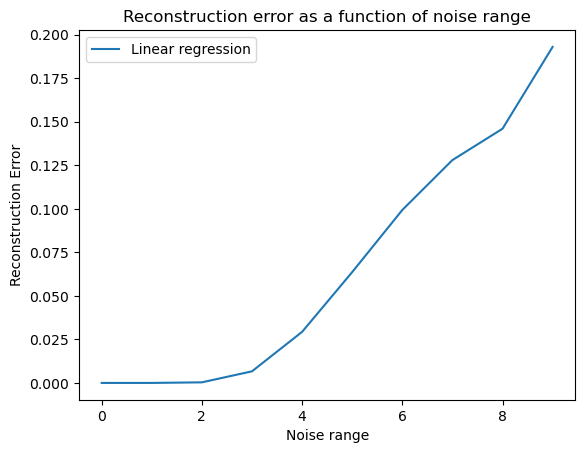

In [84]:
# Number of individuals
n = 100
# Number of subsets (queries)
m = 5*n
#Number of iterations
num_iterations = 30
#Probability that a data point is 1
p = 0.5

Error = []
lin_reg_error_list = []
noise_range = range(0, 10)
for noise_scale in noise_range:
    lin_reg_error = []
    lin_prog_error = []
    for sim in range(num_iterations):
        data = np.random.choice([0, 1], size=(n, 1), p=[1-p, p])
        Q = np.random.choice([0, 1], size=(m, n))
        r = Q.dot(data) + np.random.choice(range(-noise_scale, noise_scale+1), size=(m, 1))
        rec_reg = rec_lin_reg(Q, r)
        lin_reg_error.append(np.mean(abs(rec_reg-data)))
    lin_reg_error_list.append(np.mean(lin_reg_error))

plt.plot(noise_range, lin_reg_error_list, label='Linear regression')
plt.xlabel('Noise range')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error as a function of noise range')
plt.legend()
plt.show()

# Linear programming example

Linear programming solves problems of the following form:

$~~~~~~~~~~~~~~~~~~~~ \underset{x}{\min} c^{T} x$

subject to: $A_{ub} x \le b_{ub}$

$~~~~~~~~~~~~~~~~~ l \le x \le u$

In [100]:
# Miniize 3x -2y + 4z
# subject to:
# x + y + z <= 5
# x - 2y + 4z >= 2
# x, y, z >= 0
# x < 4, y < 3
c = np.array([3, -2, 4])
A_1 = np.array([1, 1, 1])
A_2 = np.array([-1, 2, -4])
A_ub = np.vstack([A_1, A_2])
b_ub = np.array([5, -2])
lhs_bounds = np.zeros((3, 1))
rhs_bounds = np.array([[4], [3], [None]])
bounds = np.hstack([lhs_bounds, rhs_bounds])
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print(res)

[[ 1  1  1]
 [-1  2 -4]]
[[0.0 4]
 [0.0 3]
 [0.0 None]]
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 2.0
              x: [ 0.000e+00  3.000e+00  2.000e+00]
            nit: 1
          lower:  residual: [ 0.000e+00  3.000e+00  2.000e+00]
                 marginals: [ 2.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 4.000e+00  0.000e+00        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


# Linear programming reconstruction

In [83]:
def linear_programming(subsets, responses):
    return 0
